# La QFT y sumadores cuánticos



Mario Quiñones Pérez

## Quiskit

In [1]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
import numpy as np

### QFT

In [2]:
def QFT(qc, qbits = 2):
    qbits2 = qbits - 1
    
    for i in range(qbits):
        qc.h(i)
        control = i + 1
        
        for j in range(qbits2):
            qc.crz(np.pi/np.power(2, (j+1)), control, i)
            control = control + 1
            
        qc.barrier()
        qbits2 = qbits2 - 1

In [3]:
qc = QuantumCircuit(4)
QFT(qc, qbits = 4)
qc.draw()

┌───┐┌─────────┐┌─────────┐┌─────────┐ ░                             ░ »
q_0: ┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├┤ RZ(π/8) ├─░─────────────────────────────░─»
     └───┘└────┬────┘└────┬────┘└────┬────┘ ░ ┌───┐┌─────────┐┌─────────┐ ░ »
q_1: ──────────■──────────┼──────────┼──────░─┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├─░─»
                          │          │      ░ └───┘└────┬────┘└────┬────┘ ░ »
q_2: ─────────────────────■──────────┼──────░───────────■──────────┼──────░─»
                                     │      ░                      │      ░ »
q_3: ────────────────────────────────■──────░──────────────────────■──────░─»
                                            ░                             ░ »
«                      ░       ░ 
«q_0: ─────────────────░───────░─
«                      ░       ░ 
«q_1: ─────────────────░───────░─
«     ┌───┐┌─────────┐ ░       ░ 
«q_2: ┤ H ├┤ RZ(π/2) ├─░───────░─
«     └───┘└────┬────┘ ░ ┌───┐ ░ 
«q_3: ──────────■──────░─┤ H ├─░─
«                      ░ └───┘ ░

### AQFT

In [4]:
 def AQFT(qc, qbits = 2, maxc = 2):
    qbits2 = qbits - 1
    
    for i in range(qbits):
        qc.h(i)
        control = i + 1
        
        for j in range(qbits2):
            if(j < maxc):
                qc.crz(np.pi/np.power(2, (j+1)), control, i)
                control = control + 1
            
        qc.barrier()
        qbits2 = qbits2 - 1

In [5]:
qc = QuantumCircuit(4)
AQFT(qc, qbits = 4)
qc.draw()

┌───┐┌─────────┐┌─────────┐ ░                             ░      »
q_0: ┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├─░─────────────────────────────░──────»
     └───┘└────┬────┘└────┬────┘ ░ ┌───┐┌─────────┐┌─────────┐ ░      »
q_1: ──────────■──────────┼──────░─┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├─░──────»
                          │      ░ └───┘└────┬────┘└────┬────┘ ░ ┌───┐»
q_2: ─────────────────────■──────░───────────■──────────┼──────░─┤ H ├»
                                 ░                      │      ░ └───┘»
q_3: ────────────────────────────░──────────────────────■──────░──────»
                                 ░                             ░      »
«                 ░       ░ 
«q_0: ────────────░───────░─
«                 ░       ░ 
«q_1: ────────────░───────░─
«     ┌─────────┐ ░       ░ 
«q_2: ┤ RZ(π/2) ├─░───────░─
«     └────┬────┘ ░ ┌───┐ ░ 
«q_3: ─────■──────░─┤ H ├─░─
«                 ░ └───┘ ░

### Sumador Cuántico

In [6]:
def adder(qc, qbits = 2):
    qbits2 = qbits - 1
    
    for i in range(qbits):
        control = i + qbits
        qc.cz(control,i)
        
        for j in range(qbits2):
            control = control + 1
            qc.crz(np.pi/np.power(2, (j+1)), control, i)
            
        qc.barrier()
        qbits2 = qbits2 - 1

In [7]:
def QFTI(qc, qbits = 2, maxc = 2):
    qbits2 = 0
    
    for i in range(qbits):
        control = qbits - 1
        
        for j in range(qbits2):
            if(j < maxc):
                qc.crz(-np.pi/np.power(2, (j+1)), control, qbits - i - 1)
                control = control - 1
            
        qc.h(qbits - i - 1)
        qc.barrier()
        qbits2 = qbits2 + 1
        

In [8]:
# Dibujamos el circuito de lsumador completo con 8 qbits

qc = QuantumCircuit(8)

QFT(qc, qbits = 4)

adder(qc, qbits = 4)

QFTI(qc, qbits = 4, maxc = 3)

qc.draw()

┌───┐┌─────────┐┌─────────┐┌─────────┐ ░                             ░ »
q_0: ┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├┤ RZ(π/8) ├─░─────────────────────────────░─»
     └───┘└────┬────┘└────┬────┘└────┬────┘ ░ ┌───┐┌─────────┐┌─────────┐ ░ »
q_1: ──────────■──────────┼──────────┼──────░─┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├─░─»
                          │          │      ░ └───┘└────┬────┘└────┬────┘ ░ »
q_2: ─────────────────────■──────────┼──────░───────────■──────────┼──────░─»
                                     │      ░                      │      ░ »
q_3: ────────────────────────────────■──────░──────────────────────■──────░─»
                                            ░                             ░ »
q_4: ───────────────────────────────────────░─────────────────────────────░─»
                                            ░                             ░ »
q_5: ───────────────────────────────────────░─────────────────────────────░─»
                                            ░                             ░ »
q_6: ───────────────────────────────────────░─────────────────────────────░─»
                                            ░                             ░ »
q_7: ───────────────────────────────────────░─────────────────────────────░─»
                                            ░                             ░ »
«                      ░       ░    ┌─────────┐┌─────────┐┌─────────┐ ░    »
«q_0: ─────────────────░───────░──■─┤ RZ(π/2) ├┤ RZ(π/4) ├┤ RZ(π/8) ├─░────»
«                      ░       ░  │ └────┬────┘└────┬────┘└────┬────┘ ░    »
«q_1: ─────────────────░───────░──┼──────┼──────────┼──────────┼──────░──■─»
«     ┌───┐┌─────────┐ ░       ░  │      │          │          │      ░  │ »
«q_2: ┤ H ├┤ RZ(π/2) ├─░───────░──┼──────┼──────────┼──────────┼──────░──┼─»
«     └───┘└────┬────┘ ░ ┌───┐ ░  │      │          │          │      ░  │ »
«q_3: ──────────■──────░─┤ H ├─░──┼──────┼──────────┼──────────┼──────░──┼─»
«                      ░ └───┘ ░  │      │          │          │      ░  │ »
«q_4: ─────────────────░───────░──■──────┼──────────┼──────────┼──────░──┼─»
«                      ░       ░         │          │          │      ░  │ »
«q_5: ─────────────────░───────░─────────■──────────┼──────────┼──────░──■─»
«                      ░       ░                    │          │      ░    »
«q_6: ─────────────────░───────░────────────────────■──────────┼──────░────»
«                      ░       ░                               │      ░    »
«q_7: ─────────────────░───────░───────────────────────────────■──────░────»
«                      ░       ░                                      ░    »
«                            ░                ░     ░       ░                  »
«q_0: ───────────────────────░────────────────░─────░───────░──────────────────»
«     ┌─────────┐┌─────────┐ ░                ░     ░       ░                  »
«q_1: ┤ RZ(π/2) ├┤ RZ(π/4) ├─░────────────────░─────░───────░──────────────────»
«     └────┬────┘└────┬────┘ ░    ┌─────────┐ ░     ░       ░ ┌──────────┐┌───┐»
«q_2: ─────┼──────────┼──────░──■─┤ RZ(π/2) ├─░─────░───────░─┤ RZ(-π/2) ├┤ H ├»
«          │          │      ░  │ └────┬────┘ ░     ░ ┌───┐ ░ └────┬─────┘└───┘»
«q_3: ─────┼──────────┼──────░──┼──────┼──────░──■──░─┤ H ├─░──────■───────────»
«          │          │      ░  │      │      ░  │  ░ └───┘ ░                  »
«q_4: ─────┼──────────┼──────░──┼──────┼──────░──┼──░───────░──────────────────»
«          │          │      ░  │      │      ░  │  ░       ░                  »
«q_5: ─────┼──────────┼──────░──┼──────┼──────░──┼──░───────░──────────────────»
«          │          │      ░  │      │      ░  │  ░       ░                  »
«q_6: ─────■──────────┼──────░──■──────┼──────░──┼──░───────░──────────────────»
«                     │      ░         │      ░  │  ░       ░                  »
«q_7: ────────────────■──────░─────────■──────░──■──░───────░──────────────────»
«                            ░                ░     ░       ░             

In [9]:
# Dibujamos el circuito del sumador completo con 8 qbits usando una AQFT

qc = QuantumCircuit(8)

AQFT(qc, qbits = 4)

adder(qc, qbits = 4)

QFTI(qc, qbits = 4)

qc.draw()

┌───┐┌─────────┐┌─────────┐ ░                             ░      »
q_0: ┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├─░─────────────────────────────░──────»
     └───┘└────┬────┘└────┬────┘ ░ ┌───┐┌─────────┐┌─────────┐ ░      »
q_1: ──────────■──────────┼──────░─┤ H ├┤ RZ(π/2) ├┤ RZ(π/4) ├─░──────»
                          │      ░ └───┘└────┬────┘└────┬────┘ ░ ┌───┐»
q_2: ─────────────────────■──────░───────────■──────────┼──────░─┤ H ├»
                                 ░                      │      ░ └───┘»
q_3: ────────────────────────────░──────────────────────■──────░──────»
                                 ░                             ░      »
q_4: ────────────────────────────░─────────────────────────────░──────»
                                 ░                             ░      »
q_5: ────────────────────────────░─────────────────────────────░──────»
                                 ░                             ░      »
q_6: ────────────────────────────░─────────────────────────────░──────»
                                 ░                             ░      »
q_7: ────────────────────────────░─────────────────────────────░──────»
                                 ░                             ░      »
«                 ░       ░    ┌─────────┐┌─────────┐┌─────────┐ ░    »
«q_0: ────────────░───────░──■─┤ RZ(π/2) ├┤ RZ(π/4) ├┤ RZ(π/8) ├─░────»
«                 ░       ░  │ └────┬────┘└────┬────┘└────┬────┘ ░    »
«q_1: ────────────░───────░──┼──────┼──────────┼──────────┼──────░──■─»
«     ┌─────────┐ ░       ░  │      │          │          │      ░  │ »
«q_2: ┤ RZ(π/2) ├─░───────░──┼──────┼──────────┼──────────┼──────░──┼─»
«     └────┬────┘ ░ ┌───┐ ░  │      │          │          │      ░  │ »
«q_3: ─────■──────░─┤ H ├─░──┼──────┼──────────┼──────────┼──────░──┼─»
«                 ░ └───┘ ░  │      │          │          │      ░  │ »
«q_4: ────────────░───────░──■──────┼──────────┼──────────┼──────░──┼─»
«                 ░       ░         │          │          │      ░  │ »
«q_5: ────────────░───────░─────────■──────────┼──────────┼──────░──■─»
«                 ░       ░                    │          │      ░    »
«q_6: ────────────░───────░────────────────────■──────────┼──────░────»
«                 ░       ░                               │      ░    »
«q_7: ────────────░───────░───────────────────────────────■──────░────»
«                 ░       ░                                      ░    »
«                            ░                ░     ░       ░                  »
«q_0: ───────────────────────░────────────────░─────░───────░──────────────────»
«     ┌─────────┐┌─────────┐ ░                ░     ░       ░                  »
«q_1: ┤ RZ(π/2) ├┤ RZ(π/4) ├─░────────────────░─────░───────░──────────────────»
«     └────┬────┘└────┬────┘ ░    ┌─────────┐ ░     ░       ░ ┌──────────┐┌───┐»
«q_2: ─────┼──────────┼──────░──■─┤ RZ(π/2) ├─░─────░───────░─┤ RZ(-π/2) ├┤ H ├»
«          │          │      ░  │ └────┬────┘ ░     ░ ┌───┐ ░ └────┬─────┘└───┘»
«q_3: ─────┼──────────┼──────░──┼──────┼──────░──■──░─┤ H ├─░──────■───────────»
«          │          │      ░  │      │      ░  │  ░ └───┘ ░                  »
«q_4: ─────┼──────────┼──────░──┼──────┼──────░──┼──░───────░──────────────────»
«          │          │      ░  │      │      ░  │  ░       ░                  »
«q_5: ─────┼──────────┼──────░──┼──────┼──────░──┼──░───────░──────────────────»
«          │          │      ░  │      │      ░  │  ░       ░                  »
«q_6: ─────■──────────┼──────░──■──────┼──────░──┼──░───────░──────────────────»
«                     │      ░         │      ░  │  ░       ░                  »
«q_7: ────────────────■──────░─────────■──────░──■──░───────░──────────────────»
«                            ░                ░     ░       ░                  »
«      ░                               ░ ┌──────────┐┌──────────┐┌───┐ ░ 
«q_0: ─░───────────────────────────────░─┤ RZ(-π/2) ├┤ RZ(-π/4) ├┤ H ├─░─
«      ░ ┌──────────┐┌──────────

### Simulaciones

En las siguientes simulaciones comprovamos que en condiciones ideales el cicuito con QFT relizara la suma perfectamente en todas las situaciones, pero la AQFT, aunque la mayoría sean correctas, no todas sus soluciones seran las esperadas, esto es debido a que no se realizan todas las rotaciones necesarias sino que solo una cantidad fija de ellas como maximo (2 en este caso), en una simulación ideal dara paso a problemas , lo que será compensado en una simulación en backends reales ya que estas rotaciones que se obvian son muy pequeñas y dificiles de implementar lo que hace a la AQFT una buena solución, aunque no en simulaciones ideales

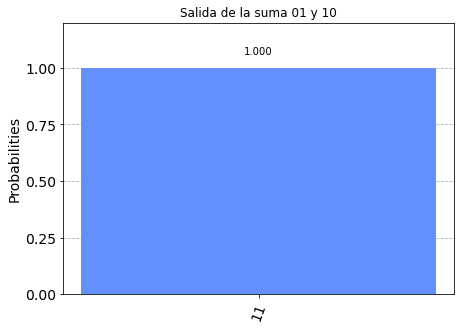

In [10]:
qc = QuantumCircuit(4, 2)

# Inicializamos a uno varias variables para realizar una suma que implique tanto sumas de unos y ceros como de unos y unos
# Representan A = 01 B = 10
qc.x(1)
qc.x(2)


# Aplicamos la QFT al circuito
QFT(qc, qbits = 2)
# Usamos un sumador de Draper
adder(qc, qbits = 2)
# Aplicamos la QFT inversa para devolver los valores
QFTI(qc, qbits = 2)

# Medimos los bits de manera que salgan en orden [q0,q1] y no al reves 
qc.measure([0,1], [1,0])

# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 01 y 10')

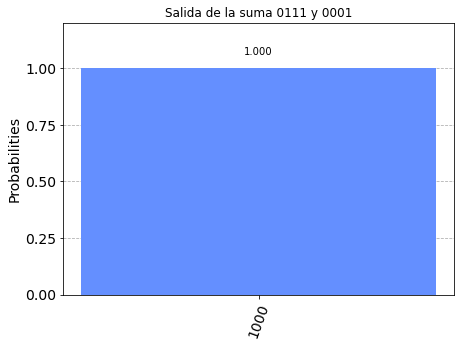

In [11]:
qc = QuantumCircuit(8,4)

# Inicializamos a uno varias variables para realizar una suma que implique tanto sumas de unos y ceros como de unos y unos 
# Representan A = 0111 B = 0001
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(7)

# Aplicamos la QFT al circuito
QFT(qc, qbits = 4)

# Usamos un sumador de Draper
adder(qc, qbits = 4)

# Aplicamos la QFT inversa para devolver los valores
QFTI(qc, qbits = 4)

# Medimos los bits de manera que salgan en orden [q0,q1,q2,q3] y no al reves 
qc.measure([0,1,2,3], [3,2,1,0])


# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 0111 y 0001')

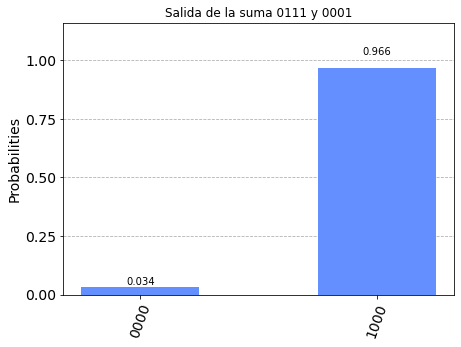

In [12]:
qc = QuantumCircuit(8,4)

# Inicializamos a uno varias variables para realizar una suma que implique tanto sumas de unos y ceros como de unos y unos 
# Representan A = 0111 B = 0001
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(7)

# Aplicamos la AQFT al circuito con un maximo de dos rotaciones
AQFT(qc, qbits = 4)

# Usamos un sumador de Draper
adder(qc, qbits = 4)

# Aplicamos la QFT inversa para devolver los valores
QFTI(qc, qbits = 4)

# Medimos los bits de manera que salgan en orden [q0,q1,q2,q3] y no al reves 
qc.measure([0,1,2,3], [3,2,1,0])


# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 0111 y 0001')

### Ejecuciones en backends reales

Ya que no tenemos disponibles backends reales con 8 qubits que no tengan menos de 16000 trabjaos encolados realizaremos la suma de 2 qubits. Para ello creamos dos circuitos uno con QFT y otro con AQFT de maximo numero de rotaciones 1 para que se diferencie con la QFT.

Como observamos en los resultados podemos ver que la AQFT no reduce la cantidad de aciertos, sino que en este caso los a aumentado hasta un 12% lo que nos demuestra que en la practica la AQFT, aunque tenga menos rotaciones controladas, no es una mala aproximación de la misma y da buenos resultados

In [13]:
qc = QuantumCircuit(4, 2)

qc.x(1)
qc.x(2)
QFT(qc, qbits = 2)
adder(qc, qbits = 2)
QFTI(qc, qbits = 2)

qc.measure([0,1], [0, 1])

In [14]:
qca = QuantumCircuit(4, 2)

qca.x(1)
qca.x(2)
AQFT(qca, qbits = 2, maxc = 1)
adder(qca, qbits = 2)
QFTI(qca, qbits = 2)

qca.measure([0,1], [0, 1])

In [15]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.save_account('your account', overwrite=True)
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(t_qc)
job = backend.run(qobj)

least busy backend:  ibmqx2


In [16]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


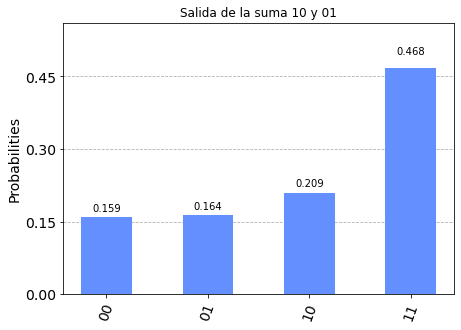

In [17]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc), title='Salida de la suma 10 y 01')

In [18]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qca = transpile(qca, backend, optimization_level=3)
qobj = assemble(t_qca)
job = backend.run(qobj)

least busy backend:  ibmqx2


In [19]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


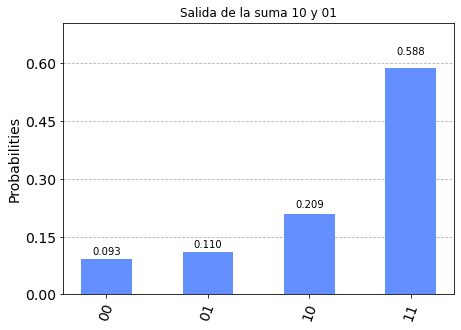

In [20]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qca), title='Salida de la suma 10 y 01')